In [1]:
# Include numpy and link instance to variable np
import numpy as np

# Include library and link instance to plt
import matplotlib.pyplot as plt

# Scikit learn for data set and other methods
from sklearn import datasets
# Scipy for HAC implementation
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# using the common iris data set
iris = datasets.load_iris()
x = iris.data[:, :2]

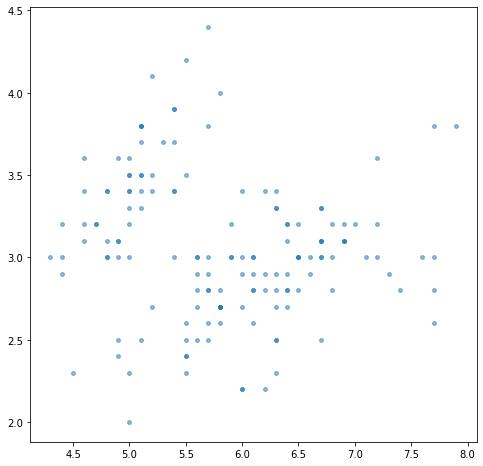

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x[:,0], x[:,1], s=15, alpha=0.5)
plt.show()

In [15]:
# Dimensions
x.shape

(150, 2)

# L03.1 [Hierarchical Agglomerative Clustering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

In [23]:
# generate the linkage matrix
Z = linkage(y=x, method='complete', metric='euclidean', optimal_ordering=False)  # Be aware of the method. The results will vary

### Performance of the clustering
To get a feeling how good the linkage keeps the pairwise distances we use the so-called cophenetic correlation. The cophenetic correlation $ c$ is a measure of how faithfully a dendrogram peserves the pairwise distances between the original data points.
\begin{align}
{\displaystyle c={\frac {\sum _{i<j}[x(i,j)-{\bar {x}}][t(i,j)-{\bar {t}}]}{\sqrt {\sum _{i<j}[x(i,j)-{\bar {x}}]^{2}\sum _{i<j}[t(i,j)-{\bar {t}}]^{2}}}}}
\end{align} with
\begin{align}
    {\displaystyle x(i,j)=|X_{i}-X_{j}|}
\end{align} as the Euclidean distance between the $i$ th and $j$ th observations. $\bar{x} $ describes hereby the average of $ x(i, j) $. We denote $ t(i,j) $ as the dendrogrammatic distance between the model points $ T_{i} $ and $ T_{j}$. This distance is the height of the node at which these two points are first joined together.

Limits: 
\begin{align}
 0 \leq c \leq 1
\end{align}

In [25]:

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(x))

print(c)

0.6583040832365201


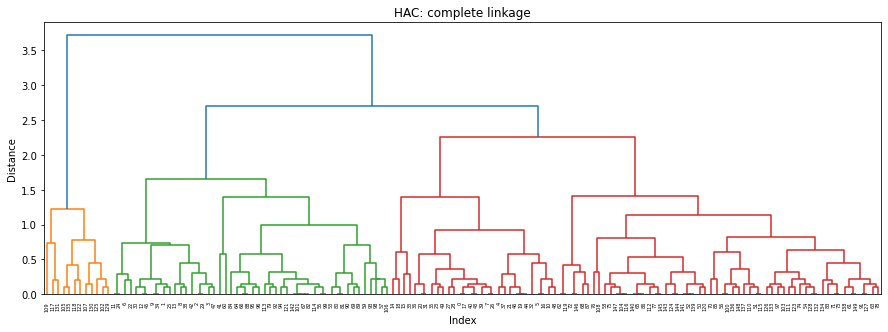

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('HAC: complete linkage')
ax.set_xlabel('Index')
ax.set_ylabel('Distance')
dendrogram(Z)
fig.savefig('HAC_iris.png', bbox_inches='tight', transparent=True)

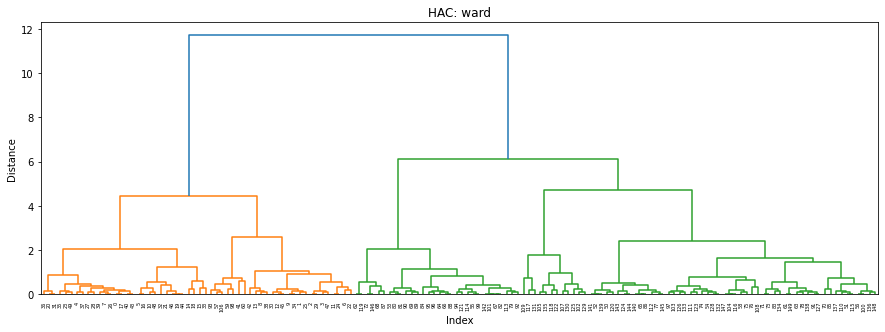

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('HAC: ward')
ax.set_xlabel('Index')
ax.set_ylabel('Distance')
dendrogram(linkage(y=x, method='ward'))
plt.show()